# **Breast Cancer Prognosis Prediction Project**

---

### **Objective**

The primary objective of this project is to utilize data science & ML methodologies to predict patient outcomes based on clinical features. By analyzing the dataset, we aim to uncover critical factors influencing prognosis and survival, and then develop a predictive model to forecast survival chances.

### **Dataset**

#### Features Description

The dataset used for breast cancer prognosis prediction contains several features that will be explored to assess their impact on patient outcomes:

1. **Age**  
   - **Description**: The age of the patient in years.  

2. **Race**  
   - **Description**: Ethnicity of the patient (e.g., White, Black, Asian).  

3. **Marital Status**  
   - **Description**: Marital status of the patient (e.g., Married, Divorced).  

4. **T Stage**  
   - **Description**: Tumor stage (e.g., T1, T2), indicating the size and extent of the primary tumor.  

5. **N Stage**  
   - **Description**: Node stage (e.g., N1, N2), reflecting the extent of lymph node involvement.  

6. **6th Stage**  
   - **Description**: Breast cancer stage classification based on the 6th edition TNM staging system (e.g., IIA, IIIA).  

7. **Differentiation**  
   - **Description**: Describes how much tumor cells resemble normal cells (e.g., Poorly differentiated, Moderately differentiated).  

8. **Grade**  
   - **Description**: A numerical value (e.g., 1-3) indicating tumor aggressiveness.  

9. **A Stage**  
   - **Description**: Additional stage data related to the spread of cancer in the body.  

10. **Tumor Size**  
    - **Description**: Size of the tumor in millimeters.  

11. **Estrogen Status**  
    - **Description**: Indicates if the tumor is estrogen-receptor-positive or negative (ER status).  

12. **Progesterone Status**  
    - **Description**: Indicates if the tumor is progesterone-receptor-positive or negative (PR status).  

13. **Regional Nodes Examined**  
    - **Description**: Number of regional lymph nodes examined during surgery.  

14. **Regional Node Positive**  
    - **Description**: Number of lymph nodes with cancer present.  

15. **Survival Months**  
    - **Description**: Number of months the patient has survived since diagnosis.  

16. **Status**  
    - **Description**: The patient's current status (Alive or Dead).  

---

### **Project Scope**

1. **Exploratory Data Analysis (EDA)**:  
   - We will begin by understanding the dataset, visualizing the distributions, and analyzing the relationships between variables.
   - Statistical analysis will help identify key factors impacting breast cancer prognosis.

2. **Machine Learning (ML)**:  
   - After conducting EDA, we will develop machine learning models to predict patient survival and outcomes.
   - We will explore multiple classification algorithms, evaluate model performance, and fine-tune the models to improve prediction accuracy.

---

This project aims to demonstrate the practical application of predictive analytics in healthcare. By leveraging historical patient data, we hope to contribute to the early detection of high-risk patients and potentially assist in optimizing treatment strategies.

---

**Let’s begin our analysis!**

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots


In [64]:
df = pd.read_csv('Breast_Cancer.csv')

## Explore the Data

In [65]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [67]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

> NO missing values

> # **Exploratory Data Analysis(EDA)**

## Splitting Data by Status (Alive/Dead)

In [68]:
alive = df[df["Status"] == "Alive"].reset_index().drop(columns=["index"])
dead = df[df["Status"] == "Dead"].reset_index().drop(columns=["index"])


### **Creating Distribution Histograms**

#### Age Distribution by Status

In [69]:
figh_1 = px.histogram(df, x="Age", color='Status', barmode='group',
                      title="Distribution of Age by Status", histfunc='avg')
figh_1.update_layout(yaxis_title='Average Age')
figh_1.show()


#### Race Distribution by Status

In [70]:
figh_2 = px.histogram(df, x="Race", color='Status', barmode='group',
                      title="Distribution of Race by Status", histfunc='avg')
figh_2.update_layout(yaxis_title='Average Race')
figh_2.show()


#### Marital Status Distribution by Status

In [71]:
figh_3 = px.histogram(df, x="Marital Status", color='Status', barmode='group',
                      title="Distribution of Marital Status by Status", histfunc='avg')
figh_3.update_layout(yaxis_title='Average Marital Status')
figh_3.show()


#### T Stage Distribution by Status

In [72]:
df.columns = df.columns.str.strip()

figh_4 = px.histogram(df, x="T Stage", color='Status', barmode='group',
                      title="Distribution of T Stage by Status", histfunc='avg')
figh_4.update_layout(yaxis_title='Average T Stage')
figh_4.show()


#### N Stage Distribution by Status

In [73]:
figh_5 = px.histogram(df, x="N Stage", color='Status', barmode='group',
                      title="Distribution of N Stage by Status", histfunc='avg')
figh_5.update_layout(yaxis_title='Average N Stage')
figh_5.show()


#### 6th Stage Distribution by Status

In [74]:
figh_6 = px.histogram(df, x="6th Stage", color='Status', barmode='group',
                      title="Distribution of 6th Stage by Status", histfunc='avg')
figh_6.update_layout(yaxis_title='Average 6th Stage')
figh_6.show()


#### Differentiation Distribution by Status

In [75]:
figh_7 = px.histogram(df, x="differentiate", color='Status', barmode='group',
                      title="Distribution of Differentiation by Status", histfunc='avg')
figh_7.update_layout(yaxis_title='Average Differentiation')
figh_7.show()


#### A Stage Distribution by Status

In [76]:
figh_8 = px.histogram(df, x="A Stage", color='Status', barmode='group',
                      title="Distribution of A Stage by Status", histfunc='avg')
figh_8.update_layout(yaxis_title='Average A Stage')
figh_8.show()


### **Comparing Alive/Dead Status with Pie Charts**

#### Pie Charts for Race

In [77]:
fig_r1 = px.pie(df[df["Status"] == "Alive"], names='Race')
fig_r2 = px.pie(df[df["Status"] == "Dead"], names='Race')

Race_fig = make_subplots(rows=1, cols=2, subplot_titles=("Race Distribution (Alive)", "Race Distribution (Dead)"),
                         specs=[[{'type': 'pie'}, {'type': 'pie'}]])

Race_fig.add_trace(fig_r1.data[0], row=1, col=1)
Race_fig.add_trace(fig_r2.data[0], row=1, col=2)
Race_fig.show()


#### Pie Charts for Marital Status

In [78]:
fig_M1 = px.pie(df[df["Status"] == "Alive"], names='Marital Status')
fig_M2 = px.pie(df[df["Status"] == "Dead"], names='Marital Status')

Marital_fig = make_subplots(rows=1, cols=2, subplot_titles=("Marital Status (Alive)", "Marital Status (Dead)"),
                            specs=[[{'type': 'pie'}, {'type': 'pie'}]])

Marital_fig.add_trace(fig_M1.data[0], row=1, col=1)
Marital_fig.add_trace(fig_M2.data[0], row=1, col=2)
Marital_fig.show()


#### Pie Charts for T Stage

In [79]:
fig_t1 = px.pie(df[df["Status"] == "Alive"], names='T Stage')
fig_t2 = px.pie(df[df["Status"] == "Dead"], names='T Stage')

T_Stage_fig = make_subplots(rows=1, cols=2, subplot_titles=("T Stage (Alive)", "T Stage (Dead)"),
                            specs=[[{'type': 'pie'}, {'type': 'pie'}]])

T_Stage_fig.add_trace(fig_t1.data[0], row=1, col=1)
T_Stage_fig.add_trace(fig_t2.data[0], row=1, col=2)
T_Stage_fig.show()


### **Analyzing Continuous Variables**

#### Tumor Size

In [80]:
fig_Tm = px.box(df, x='Status', y='Tumor Size', color='Status',
                color_discrete_sequence=['blue', 'red'], category_orders={'Status': ["Alive", "Dead"]})
fig_Tm.show()

#### Regional Node Examined

In [81]:
fig_RNE = px.box(df, x='Status', y='Regional Node Examined', color='Status',
                 color_discrete_sequence=['blue', 'red'], category_orders={'Status': ["Alive", "Dead"]})
fig_RNE.show()


### Examine feature Correlations

#### Age vs Tumor Size

In [82]:
fig_at = px.scatter(df, x='Age', y='Tumor Size', color='Status',
                    color_discrete_map={'Alive': 'blue', 'Dead': 'red'},
                    title="Age vs Tumor Size by Status")
fig_at.show()

#### Age vs Survival Months

In [83]:
fig_sm = px.scatter(df, x='Age', y='Survival Months', color='Status',
                    color_discrete_map={'Alive': 'blue', 'Dead': 'red'},
                    title="Age vs Survival Months by Status")
fig_sm.show()


#### Correlation Matrix

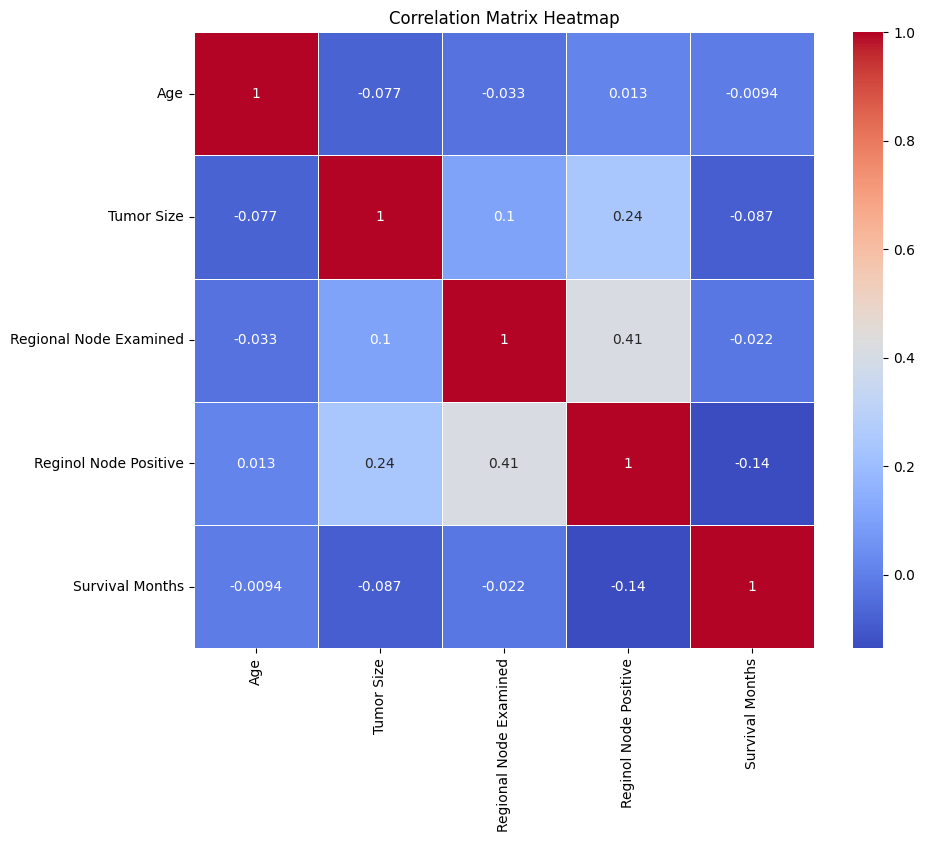

In [84]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [85]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [88]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Status'])

X = df.drop('Status', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

In [89]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()) 
        ]), numerical_features),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [90]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'model__C': [0.1, 1, 10],
        'model__penalty': ['l2']
    },
    'Decision Tree': {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.3]
    }
}

In [91]:
best_models = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    print(f"Cross-validation accuracy for {model_name}: {cross_val_scores.mean():.4f} ± {cross_val_scores.std():.4f}")

    best_models[model_name] = grid_search.best_estimator_

for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")



Training Logistic Regression...
Best Parameters for Logistic Regression: {'model__C': 0.1, 'model__penalty': 'l2'}
Cross-validation accuracy for Logistic Regression: 0.8916 ± 0.0109

Training Decision Tree...
Best Parameters for Decision Tree: {'model__max_depth': 10, 'model__min_samples_split': 10}
Cross-validation accuracy for Decision Tree: 0.8782 ± 0.0113

Training Random Forest...
Best Parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Cross-validation accuracy for Random Forest: 0.9012 ± 0.0069

Training XGBoost...
Best Parameters for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
Cross-validation accuracy for XGBoost: 0.9043 ± 0.0055

Test Accuracy for Logistic Regression: 0.9019

Test Accuracy for Decision Tree: 0.9019

Test Accuracy for Random Forest: 0.9130

Test Accuracy for XGBoost: 0.9106



Evaluating Logistic Regression...


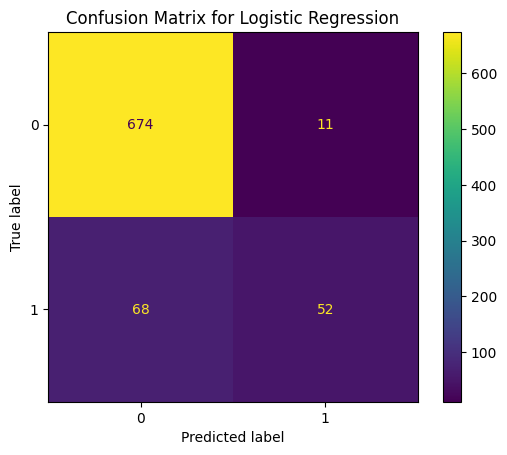


Evaluating Decision Tree...


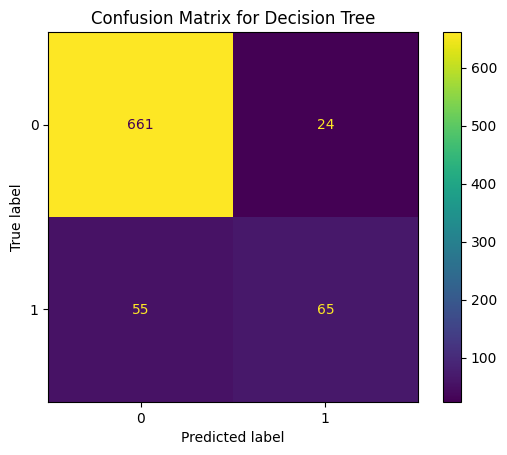


Evaluating Random Forest...


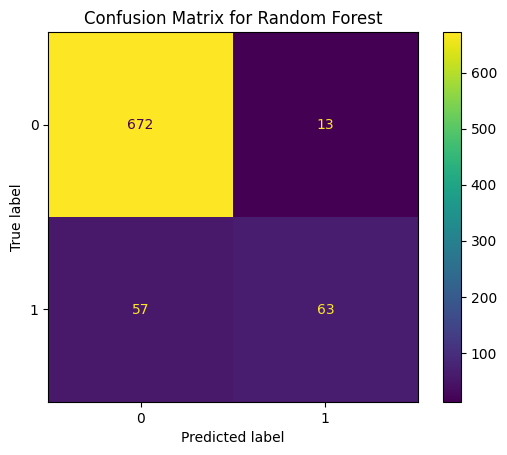


Evaluating XGBoost...


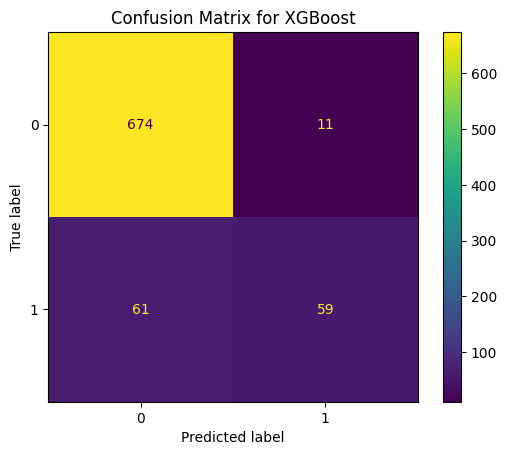

                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.901863   0.825397  0.433333  0.568306  0.902530
Decision Tree        0.901863   0.730337  0.541667  0.622010  0.823193
Random Forest        0.913043   0.828947  0.525000  0.642857  0.889258
XGBoost              0.910559   0.842857  0.491667  0.621053  0.902299


In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

metrics = {}

for model_name, best_model in best_models.items():
    print(f"\nEvaluating {model_name}...")

    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


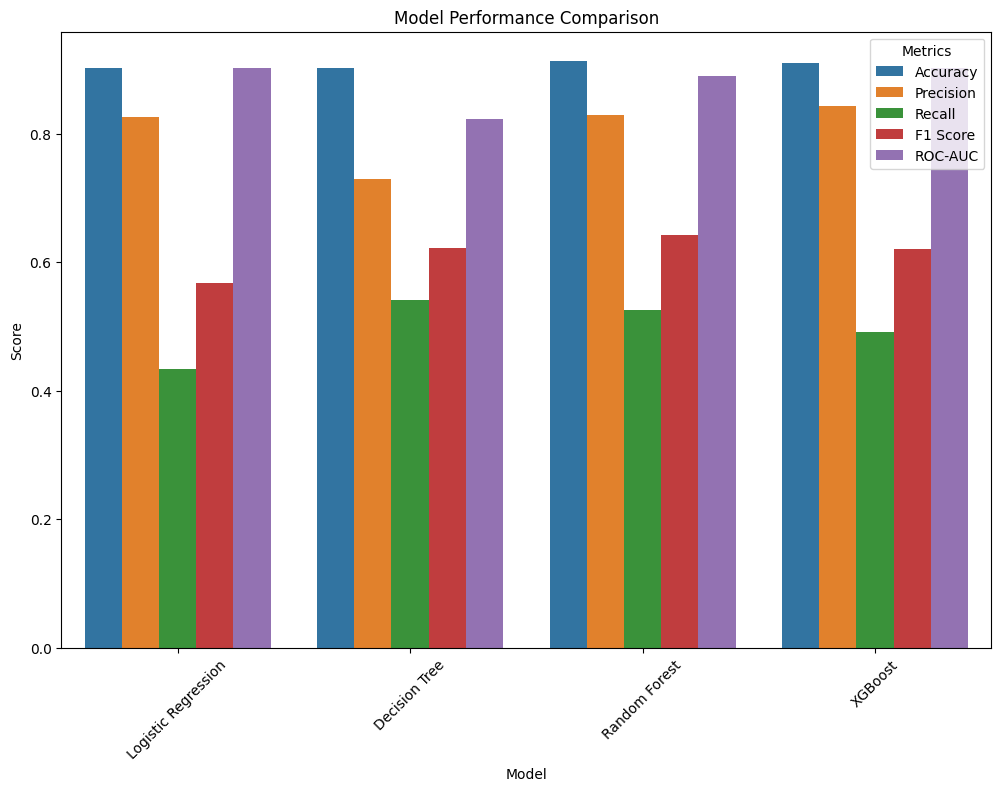

In [93]:
plt.figure(figsize=(12, 8))

sns.barplot(data=metrics_df.reset_index().melt(id_vars='index'),
            x='index', y='value', hue='variable')

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()
